<a href="https://colab.research.google.com/github/aniray2908/ML-foundations-rebuild/blob/main/unsupervised_learning/demos/02_kmeans_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering Demonstration

Goal:
- Visualize WCSS (inertia) behavior
- Apply elbow method
- Compute silhouette scores
- Observe failure on non-spherical data
- Examine effect of scaling

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_moons
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

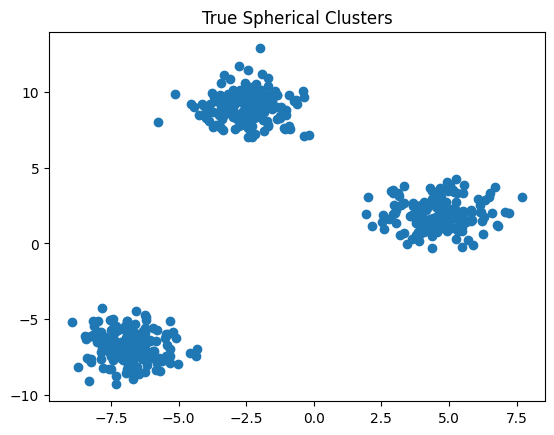

In [2]:
X, _ = make_blobs(n_samples=500, centers=3, cluster_std=1.0, random_state=42)

plt.scatter(X[:,0], X[:,1])
plt.title("True Spherical Clusters")
plt.show()

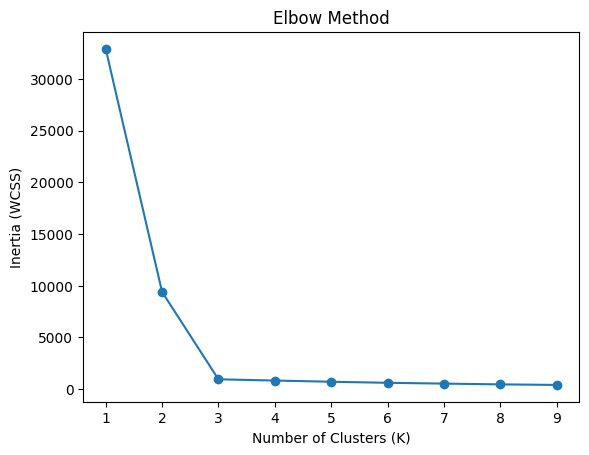

In [3]:
inertias = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(K_range, inertias, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method")
plt.show()

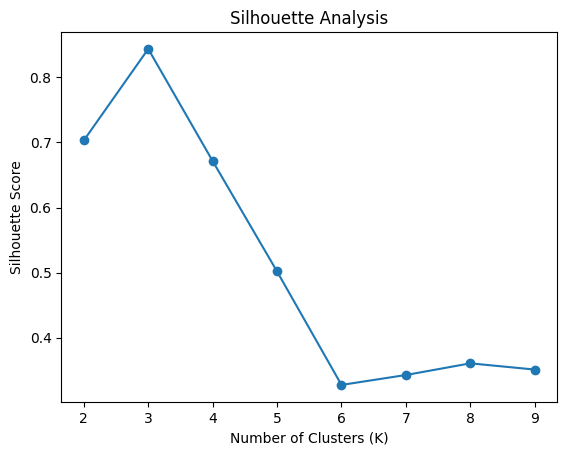

In [4]:
sil_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    sil_scores.append(silhouette_score(X, labels))

plt.plot(range(2,10), sil_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

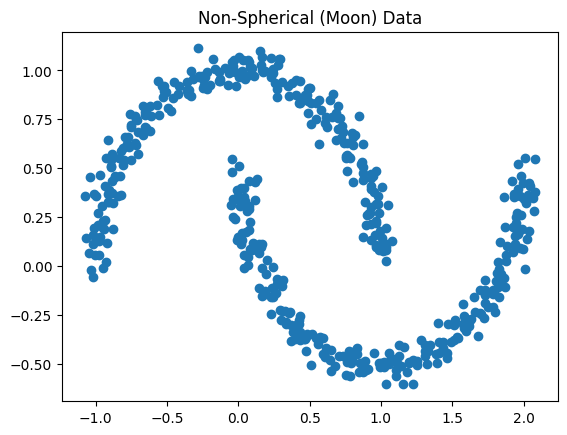

In [5]:
X_moon, _ = make_moons(n_samples=500, noise=0.05, random_state=42)

plt.scatter(X_moon[:,0], X_moon[:,1])
plt.title("Non-Spherical (Moon) Data")
plt.show()

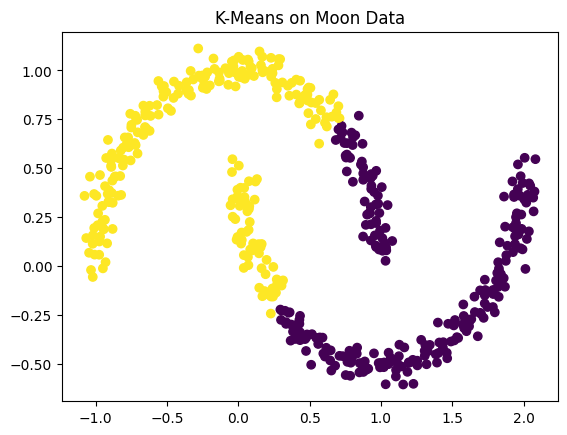

In [6]:
kmeans_moon = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_moon = kmeans_moon.fit_predict(X_moon)

plt.scatter(X_moon[:,0], X_moon[:,1], c=labels_moon)
plt.title("K-Means on Moon Data")
plt.show()

In [7]:
X_scaled_test, _ = make_blobs(n_samples=500, centers=3, random_state=42)

# artificially distort one feature
X_scaled_test[:,0] *= 100

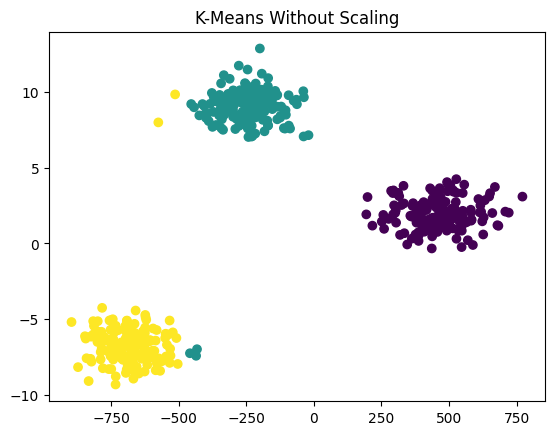

In [8]:
kmeans_unscaled = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_unscaled = kmeans_unscaled.fit_predict(X_scaled_test)

plt.scatter(X_scaled_test[:,0], X_scaled_test[:,1], c=labels_unscaled)
plt.title("K-Means Without Scaling")
plt.show()

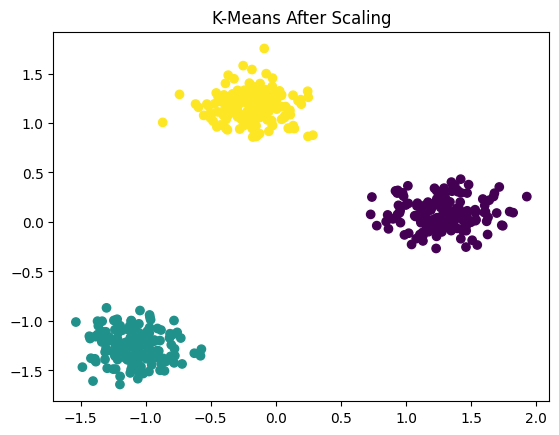

In [9]:
scaler = StandardScaler()
X_fixed = scaler.fit_transform(X_scaled_test)

kmeans_scaled = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_scaled = kmeans_scaled.fit_predict(X_fixed)

plt.scatter(X_fixed[:,0], X_fixed[:,1], c=labels_scaled)
plt.title("K-Means After Scaling")
plt.show()

Observations:

1. Inertia decreases monotonically as K increases.
2. Elbow indicates diminishing returns in compactness.
3. Silhouette score balances compactness and separation.
4. K-Means fails on non-spherical clusters.
5. Scaling strongly affects cluster assignments.

K-Means works well when:
- Clusters are spherical
- Feature scales are comparable
- Noise dimensions are limited